In [2]:
# import python libraries

import pandas as pd
import nbconvert
import matplotlib.pyplot as plt
import numpy as np
import scipy
import xlrd
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
import re, string, unicodedata
import os
import glob
import gensim
import nltk
#import contractions
import inflection as inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from string import ascii_lowercase
import itertools, snowballstemmer
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import Word2Vec
import spacy
#import basemap as basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from geopy.geocoders import Nominatim
import math
a ='a'

C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
import spacy
# Load the spacy model that you have installed
nlp = spacy.load('en_core_web_sm')
# process a sentence using the model
doc = nlp("This is some text that I am processing with Spacy")
# It's that simple - all of the vectors and words are assigned after this point
# Get the vector for 'text':
doc[3].vector
# Get the mean vector for the entire sentence (useful for sentence classification etc.)
doc.vector
a='a'

In [25]:
#Data Exploration
# 3.0 Exploration Data Analysis

'''
In this section visual plots and tables are used to explore the variables especially as good predictors of
different categories of gender.
The relationship between variables are visualised and the hypotheses proposed.
'''
from datetime import timedelta
import plotly
import xml.etree.ElementTree as et
from math import sin, cos, sqrt, atan2, radians
# from geopy.distance import distance
from plotly.graph_objs import Data, Scatter, Layout, Figure, Histogram
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.core.display import display, HTML
#import gmaps
from IPython.display import Image
import plotly.plotly as ply
#from matplotlib import basemap

In [ ]:
'''
4.0 Feature extraction, transformation and Engineering'''
b = 'b'

In [127]:
# binarise count or frequency of occurance

binarize_twcount = np.array(gender_exp_df['tweet_count']) 
binarize_twcount[binarize_twcount >= 1] = 1
gender_exp_df['binarize_twcount'] = binarize_twcount

#using scikit-learn's Binarizer class here from preprocessing module to binarize instead of numpy arrays.
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=0.9)

sk_binarize_twcount = bn.transform([gender_exp_df['tweet_count']])[0]

gender_exp_df['sk_binarize_twcount'] = sk_binarize_twcount


gender_exp_df[['tweet_count','sk_binarize_twcount','binarize_twcount']].head(11)


,tweet_count,sk_binarize_twcount,binarize_twcount
0,110964,1,1
1,7471,1,1
2,5617,1,1
3,1693,1,1
4,31462,1,1
5,20036,1,1
6,13354,1,1
7,112117,1,1
8,482,1,1
9,26085,1,1


In [128]:
# fav_number measures the popularity of tweets

gender_exp_df['fav_percent'] = gender_exp_df.fav_number/np.sum(gender_exp_df.fav_number)*100

gender_exp_df['fav_percent'].head(5)

0    0.000000
1    0.000077
2    0.008759
3    0.000230
4    0.042473
Name: fav_percent, dtype: float64

In [129]:
# Rounding to 1000

gender_exp_df['fav_pop1000'] = np.array(np.round((gender_exp_df['fav_percent'] * 1000)),  dtype='int') 

gender_exp_df['fav_pop1000'].head(5)

0     0
1     0
2     9
3     0
4    42
Name: fav_pop1000, dtype: int32

In [130]:
# build a feature called interaction showing the interaction between tweet count and fav_number
tw_countfav = gender_exp_df[['tweet_count', 'fav_number']]

from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, interaction_only=False,  
                        include_bias=False)

res = pf.fit_transform(tw_countfav)

res[:5]

array([[1.10964000e+05, 0.00000000e+00, 1.23130093e+10, 0.00000000e+00,
        0.00000000e+00],
       [7.47100000e+03, 6.80000000e+01, 5.58158410e+07, 5.08028000e+05,
        4.62400000e+03],
       [5.61700000e+03, 7.69600000e+03, 3.15506890e+07, 4.32284320e+07,
        5.92284160e+07],
       [1.69300000e+03, 2.02000000e+02, 2.86624900e+06, 3.41986000e+05,
        4.08040000e+04],
       [3.14620000e+04, 3.73180000e+04, 9.89857444e+08, 1.17409892e+09,
        1.39263312e+09]])

In [131]:
# degrees of interaction

degree_df = pd.DataFrame(pf.powers_, columns=['count_degree','fav_degree'])


degree_df.head(5)

,count_degree,fav_degree
0,1,0
1,0,1
2,2,0
3,1,1
4,0,2


In [132]:
# interaction features

intr_features = pd.DataFrame(res, columns=['tweet_count', 'fav_number',  
                                           'tweet_count^2', 
                                           'tweet_countxfav_number',  
                                           'fav_number^2'])
intr_features.head(5)


,tweet_count,fav_number,tweet_count^2,tweet_countxfav_number,fav_number^2
0,110964.0,0.0,1.231301e+10,0.000000e+00,0.000000e+00
1,7471.0,68.0,5.581584e+07,5.080280e+05,4.624000e+03
2,5617.0,7696.0,3.155069e+07,4.322843e+07,5.922842e+07
3,1693.0,202.0,2.866249e+06,3.419860e+05,4.080400e+04
4,31462.0,37318.0,9.898574e+08,1.174099e+09,1.392633e+09


In [133]:
# categorical feature engineering ( norminal user_timezone, user_location, text. description)

In [134]:
# features from text data
# as a feature the positive and negative sentiment polarity of text by different categories of gender could be a differentiator.
# using textBlob the polarity of texts are extracted for as classification feature
'''
Spark.ml.feautures.Word2Vec vectorize sentences
Spark (naively) uses average of vectors for all words in the document as representation of the document.
"The Word2VecModel transforms each document into a vector using the average of all words in the document;
this vector can then be used as features for prediction, document similarity calculations, etc
'''
from textblob import TextBlob

gender_exp_df['text_clean'] = gender_exp_df['text_clean'].astype(str)

gender_exp_df['text_sentiment'] = gender_exp_df['text_clean'].apply(lambda x: TextBlob(x).sentiment[0] )

gender_exp_df[['text_clean','text_sentiment']].head(2)



,text_clean,text_sentiment
0,robbi respond critic win eddi edward worldtitl...,0.800000
1,felt friend live stori httpstcoarng yhno retir...,0.136364


In [135]:
# tweet text vectorisation
from pyspark.sql.session import SparkSession

# instantiate Spark
spark = SparkSession.builder.getOrCreate()

gender_text_df11 = gender_exp_df.loc[:,['unit_id','text_clean']].astype(str) # select unit_id and text_clean

# create pyspark dataframe
spark_text_df11 = spark.createDataFrame(gender_text_df11)

# display two rows

#spark_timezone_df9.show(n=2)

# tokenise the words

txt_tokenizer = Tokenizer(inputCol="text_clean", outputCol="text_words")
txt_wordsData = txt_tokenizer.transform(spark_text_df11)

#txt_wordsData.show(n=2)

# Learn a mapping from words to Vectors.

txt_word2Vec = Word2Vec(vectorSize=7, minCount=0, inputCol="text_words", outputCol="txt_result")

txt_model = txt_word2Vec.fit(txt_wordsData)

txt_transform = txt_model.transform(txt_wordsData)


# change to pandas dataframe and merge to major dataframe

text_result_df2 = txt_transform.toPandas()
# convert result to list then a dataframe

Txtresult = text_result_df2['txt_result'].tolist()   # convert to python list

txtresult_pd_df = pd.DataFrame(Txtresult, columns=['textvec1', 'textvec2', 'textvec3', 'textvec4', 'textvec5', 'textvec6', 'textvec7'], index = range(20050)) # to datafram

gender_exp_df.index = range(20050)

# merge to gender_exp_df dataframe
gender_exp_df12 = pd.concat([gender_exp_df, txtresult_pd_df], axis=1)

gender_exp_df12.head(3)


,Unnamed: 0,unit_id,gender,gender_confidence,fav_number,profileimage,retweet_count,tweet_coord,tweet_count,tweet_created,...,fav_percent,fav_pop1000,text_sentiment,textvec1,textvec2,textvec3,textvec4,textvec5,textvec6,textvec7
0,0,815719226,male,1.0000,0,https://pbs.twimg.com/profile_images/414342229...,0,NaN,110964,10/26/15 12:40,...,0.000000,0,0.800000,-0.005874,0.094237,-0.009487,-0.009862,-0.028193,0.069530,0.018526
1,1,815719227,male,1.0000,68,https://pbs.twimg.com/profile_images/539604221...,0,NaN,7471,10/26/15 12:40,...,0.000077,0,0.136364,0.027986,0.127141,-0.055437,0.003331,-0.075345,0.053394,0.026976
2,2,815719228,male,0.6625,7696,https://pbs.twimg.com/profile_images/657330418...,1,NaN,5617,10/26/15 12:40,...,0.008759,9,0.204167,0.025116,0.212035,-0.110323,0.029419,-0.061153,0.054980,0.102623


In [136]:
# craete word vectors for description of user

gender_description_df11 = gender_exp_df.loc[:,['unit_id','clean_description']].astype(str) # select unit_id and text_clean

# create pyspark dataframe
spark_description_df11 = spark.createDataFrame(gender_description_df11)

# tokenise the words

descr_tokenizer = Tokenizer(inputCol="clean_description", outputCol="descr_words")
descr_wordsData = descr_tokenizer.transform(spark_description_df11)


# Learn a mapping from words to Vectors.

descr_word2Vec = Word2Vec(vectorSize=7, minCount=0, inputCol="descr_words", outputCol="descr_result")

descr_model = descr_word2Vec.fit(descr_wordsData)

descr_transform = descr_model.transform(descr_wordsData)


# change to pandas dataframe and merge to major dataframe

descr_result_df2 = descr_transform.toPandas()
# convert result to list then a dataframe

Descrresult = descr_result_df2['descr_result'].tolist()   # convert to python list

descrresult_pd_df = pd.DataFrame(Descrresult, columns=['descriptionv1', 'decriptionv2', 'descriptionv3', 'descriptionv4', 'descriptionv5', 'descriptionv6', 'descriptionv7'], index = range(20050)) # to datafram

# merge to gender_exp_df dataframe

gender_exp_df12 = pd.concat([gender_exp_df, descrresult_pd_df], axis=1)

gender_exp_df12.head(3)


,Unnamed: 0,unit_id,gender,gender_confidence,fav_number,profileimage,retweet_count,tweet_coord,tweet_count,tweet_created,...,fav_percent,fav_pop1000,text_sentiment,descriptionv1,decriptionv2,descriptionv3,descriptionv4,descriptionv5,descriptionv6,descriptionv7
0,0,815719226,male,1.0000,0,https://pbs.twimg.com/profile_images/414342229...,0,NaN,110964,10/26/15 12:40,...,0.000000,0,0.800000,0.178497,0.260053,0.065201,0.370167,-0.537590,0.048419,0.061480
1,1,815719227,male,1.0000,68,https://pbs.twimg.com/profile_images/539604221...,0,NaN,7471,10/26/15 12:40,...,0.000077,0,0.136364,0.081630,-0.096244,0.006396,0.069474,-0.069121,0.204931,-0.201515
2,2,815719228,male,0.6625,7696,https://pbs.twimg.com/profile_images/657330418...,1,NaN,5617,10/26/15 12:40,...,0.008759,9,0.204167,0.083748,-0.039433,0.014055,0.059679,-0.073077,0.180050,-0.018025


In [137]:
# check all extracted features in the data frame and concatenate any missing feature

gender_exp_df12. info()


# save the data after feature extraction


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 45 columns):
Unnamed: 0             20050 non-null int64
unit_id                20050 non-null int64
gender                 19953 non-null object
gender_confidence      20024 non-null float64
fav_number             20050 non-null int64
profileimage           20050 non-null object
retweet_count          20050 non-null int64
tweet_coord            159 non-null object
tweet_count            20050 non-null int64
tweet_created          20050 non-null object
tweet_id               20050 non-null float64
text_clean             20050 non-null object
clean_description      19892 non-null object
name_last3word         20033 non-null object
name_count             20050 non-null int64
linkcolor_red          20050 non-null int64
linkcolor_green        20050 non-null int64
linkcolor_blue         20050 non-null int64
sidebar_red            20050 non-null int64
sidebar_green          20050 non-null int64
si

In [138]:
# Encoding to name_last3word

gender_exp_df12.name_last3word.nunique()  # number of unique values

4189

In [139]:
# create spark dataframe

gender_3word_df = gender_exp_df12.loc[:,['unit_id','name_last3word']].astype(str) # select unit_id and name_last3word

# create pyspark dataframe
spark_3word_df = spark.createDataFrame(gender_3word_df)

spark_3word_df.show(n=2)

+---------+--------------+
|  unit_id|name_last3word|
+---------+--------------+
|815719226|           ezy|
|815719227|           ett|
+---------+--------------+
only showing top 2 rows



In [140]:
#  fill missing values and stringindexer name_last2word

from pyspark.ml.feature import StringIndexer

last3word_indexer = StringIndexer(inputCol="name_last3word",outputCol="last3word_index")

last3word_indexed = last3word_indexer.fit(spark_3word_df).transform(spark_3word_df)

last3word_indexed.show(7)



+---------+--------------+---------------+
|  unit_id|name_last3word|last3word_index|
+---------+--------------+---------------+
|815719226|           ezy|          332.0|
|815719227|           ett|          132.0|
|815719228|           ugh|          480.0|
|815719229|           and|           91.0|
|815719230|           mma|         1477.0|
|815719231|           ous|          105.0|
|815719232|           ock|          114.0|
+---------+--------------+---------------+
only showing top 7 rows



In [141]:
# one hot encoder from output of stringIndexer
last3word_df_onehot = spark_3word_df.select("name_last3word")

from pyspark.ml.feature import OneHotEncoder, StringIndexer

stringIndexer = StringIndexer(inputCol="name_last3word", outputCol="last3word_index")
model = stringIndexer.fit(last3word_df_onehot)
indexed = model.transform(last3word_df_onehot)
encoder = OneHotEncoder(dropLast=False, inputCol="last3word_index", outputCol="last3word_vec")
encoded = encoder.transform(indexed)

encoded.show(7)


+--------------+---------------+-------------------+
|name_last3word|last3word_index|      last3word_vec|
+--------------+---------------+-------------------+
|           ezy|          332.0| (4190,[332],[1.0])|
|           ett|          132.0| (4190,[132],[1.0])|
|           ugh|          480.0| (4190,[480],[1.0])|
|           and|           91.0|  (4190,[91],[1.0])|
|           mma|         1477.0|(4190,[1477],[1.0])|
|           ous|          105.0| (4190,[105],[1.0])|
|           ock|          114.0| (4190,[114],[1.0])|
+--------------+---------------+-------------------+
only showing top 7 rows



In [142]:
# show only 2 rows

for row in encoded.take(2):
    print(row)

Row(name_last3word='ezy', last3word_index=332.0, last3word_vec=SparseVector(4190, {332: 1.0}))
Row(name_last3word='ett', last3word_index=132.0, last3word_vec=SparseVector(4190, {132: 1.0}))


In [143]:
# change to pandas dataframe and merge to major dataframe

last3word_encoded_df = encoded.toPandas()

last3word_encoded_df.head(3)

,name_last3word,last3word_index,last3word_vec
0,ezy,332.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,ett,132.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,ugh,480.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [144]:
last3word_encoded_df.last3word_vec.head(3)

0    (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1    (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2    (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: last3word_vec, dtype: object

In [145]:
'''from sklearn.preprocessing import LabelBinarizer

lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(obj_df["body_style"])
pd.DataFrame(lb_results, columns=lb_style.classes_).head()
'''

'from sklearn.preprocessing import LabelBinarizer\n\nlb_style = LabelBinarizer()\nlb_results = lb_style.fit_transform(obj_df["body_style"])\npd.DataFrame(lb_results, columns=lb_style.classes_).head()\n'

In [146]:
import re

gender_exp_df12a = gender_exp_df12.copy()
gender_exp_df12a.name_last3word = gender_exp_df12.name_last3word.astype(str)

gender_exp_df12a['name_last3word'] = gender_exp_df12a['name_last3word'].apply(lambda x: re.sub(r"[^a-zA-Z0-9]","",x))
gender_exp_df12a.name_last3word = gender_exp_df12a.name_last3word.str.replace('<', '')  # replace ! character.

'''fill NaN values in the description column with missing '''

gender_exp_df12a.name_last3word = gender_exp_df12a.name_last3word.fillna('mis')  # fill missing values with 'mis



In [147]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

gender_exp_df12a['last3word_code'] = le.fit_transform(gender_exp_df12a['name_last3word'])

gender_exp_df12a[["last3word_code", "name_last3word"]].head(11)

,last3word_code,name_last3word
0,1085,ezy
1,1020,ett
2,3638,ugh
3,182,and
4,2185,mma
5,2745,ous
6,2552,ock
7,3263,ske
8,1981,lla
9,1322,her


In [212]:
# concatenate dataframes for full features extracted

gender_feature_df = gender_exp_df12a.copy()

gender_extract_df.index=range(20050)


gender_feature_df = pd.concat([gender_feature_df,gender_extract_df ], axis=1)


gender_feature_df['text_sentiment'] = gender_exp_df['text_sentiment'].astype(str)

gender_feature_df.head(3)

,Unnamed: 0,unit_id,gender,gender_confidence,fav_number,profileimage,retweet_count,tweet_coord,tweet_count,tweet_created,...,dshastags,dsnumerics,dsupper,txword_count,txchar_count,txavg_word,txstopwords,txhastags,txnumerics,txupper
0,0,815719226,male,1.0000,0,https://pbs.twimg.com/profile_images/414342229...,0,NaN,110964,10/26/15 12:40,...,0,0,0,14,109,6.857143,0,1,0,1
1,1,815719227,male,1.0000,68,https://pbs.twimg.com/profile_images/539604221...,0,NaN,7471,10/26/15 12:40,...,0,0,0,19,139,6.368421,7,2,0,2
2,2,815719228,male,0.6625,7696,https://pbs.twimg.com/profile_images/657330418...,1,NaN,5617,10/26/15 12:40,...,0,0,0,16,80,4.062500,7,0,0,0


In [213]:
gender_feature_df.gender_confidence.describe()

count    20024.000000
mean         0.882756
std          0.191403
min          0.000000
25%          0.677800
50%          1.000000
75%          1.000000
max          1.000000
Name: gender_confidence, dtype: float64

In [214]:
gender_feature_df['gender_confidence'].isnull().sum()

26

In [215]:
# column gender_confidence

# the column 'gender_confidence' contains NaN values. Replace with mean

gender_feature2_df = gender_feature_df.copy()

gender_feature2_df['gender_confidence'] = gender_feature_df['gender_confidence'].fillna(0.882756)

gender_feature2_df['gender_confidence'].isnull().sum()

0

In [217]:
gender_feature_df.shape

(20050, 60)

In [218]:
# gender variable

gender_feature2_df['gender'].value_counts(dropna=False)

female     6700
male       6194
brand      5942
unknown    1117
NaN          97
Name: gender, dtype: int64

In [197]:
# save to diac

gender_feature2_df.to_csv("C:/Users/yasser/Desktop/Apps/hellosoda/data/gender_feature2_df.csv")

In [152]:
# Transforming gender column using label coding. This is the target variable and is categorical. There are three levels
# of nominal values. These are male, female and brand. There is also the twitter users without label NaN and unknown values.

# The data without label will be selected for validation of the model or generation evaluation

# The data with gender label will be used for model training and cross validation

# gender is the target variable.

In [219]:
gender_feature_df1 = gender_feature2_df.copy()

# change unknown to NAN
gender_feature_df1['gender'] = gender_feature2_df['gender'].replace('unknown', np.nan)

gender_feature_df1['gender'].value_counts(dropna=False), gender_model_df.shape

(female    6700
 male      6194
 brand     5942
 NaN       1214
 Name: gender, dtype: int64, (18836, 59))

In [220]:
gender_model_df = gender_feature_df1.copy()

gender_model_df = gender_feature_df1.dropna(axis=0, subset=['gender']) #labelled model data set

gender_model_df = gender_model_df.iloc[:,1:60]     #drop column 0 Unnamed

gender_validation_df = gender_feature_df1[gender_feature_df1['gender'].isnull()] #unlabelled validation data

gender_validation_df = gender_validation_df.iloc[:, 1:60] #drop the column 0 Unammed

gender_model_df.shape, gender_validation_df.shape


((18836, 59), (1214, 59))

In [221]:
gender_model_df.info(), gender_validation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18836 entries, 0 to 20049
Data columns (total 59 columns):
unit_id                18836 non-null int64
gender                 18836 non-null object
gender_confidence      18836 non-null float64
fav_number             18836 non-null int64
profileimage           18836 non-null object
retweet_count          18836 non-null int64
tweet_coord            157 non-null object
tweet_count            18836 non-null int64
tweet_created          18836 non-null object
tweet_id               18836 non-null float64
text_clean             18836 non-null object
clean_description      18696 non-null object
name_last3word         18836 non-null object
name_count             18836 non-null int64
linkcolor_red          18836 non-null int64
linkcolor_green        18836 non-null int64
linkcolor_blue         18836 non-null int64
sidebar_red            18836 non-null int64
sidebar_green          18836 non-null int64
sidebar_blue           18836 non-null int64
na

(None, None)

In [222]:
# label encode gender categories in gender_model_df data using scikit-learn label encoder

# label encoder for gender
from sklearn.preprocessing import LabelEncoder

gender_model_df1 = gender_model_df.copy()

le_gen = LabelEncoder()

gender_model_df1['gender_code'] = le_gen.fit_transform(gender_model_df1['gender'])

gender_model_df1.gender_code.value_counts(dropna=False) 


1    6700
2    6194
0    5942
Name: gender_code, dtype: int64

In [247]:
# The data for model training will be where gender_confidence = 1 and there is no NaN values in the gender column
# using the dataframe gender_model_df1. This is based on the information in data dictionary which indicates
# that gender is based on guess hence the confidence level of 1 is best for training a supervised model.

gender_model_df2 = gender_model_df1.copy()

gender_model_df2 = gender_model_df1[gender_model_df1['gender_confidence'] == 1]

gender_model_df2.shape

(13804, 60)

In [248]:
gender_model_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13804 entries, 0 to 20049
Data columns (total 60 columns):
unit_id                13804 non-null int64
gender                 13804 non-null object
gender_confidence      13804 non-null float64
fav_number             13804 non-null int64
profileimage           13804 non-null object
retweet_count          13804 non-null int64
tweet_coord            131 non-null object
tweet_count            13804 non-null int64
tweet_created          13804 non-null object
tweet_id               13804 non-null float64
text_clean             13804 non-null object
clean_description      13703 non-null object
name_last3word         13804 non-null object
name_count             13804 non-null int64
linkcolor_red          13804 non-null int64
linkcolor_green        13804 non-null int64
linkcolor_blue         13804 non-null int64
sidebar_red            13804 non-null int64
sidebar_green          13804 non-null int64
sidebar_blue           13804 non-null int64
na

In [249]:
gender_model_df2.gender_confidence.nunique()

1

In [259]:
# The percentage of the target variable 'gender'

gender_model_df2['gender'].value_counts(normalize=True) * 100

female    38.880035
male      33.707621
brand     27.412344
Name: gender, dtype: float64

In [252]:
# drop the gender,gender_confidence','unit_id and tweet_coord and all columns used for encoding then save data to disc
gender_model_df3a = gender_model_df2.copy()

gender_model_df3a = gender_model_df2.drop(['gender','gender_confidence','unit_id','tweet_coord'], axis =1)  # drop selected co;umns

gender_model_df3 = gender_model_df3a.drop(['profileimage','tweet_created','tweet_id','text_clean','text_clean','clean_description','name_last3word','text_sentiment'], axis =1)  # drop selected co;umns

gender_model_df3.to_csv("C:/Users/yasser/Desktop/Apps/hellosoda/data/gender_model_df3.csv")   # save out the data to disc

gender_model_df3.info()   # display header

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13804 entries, 0 to 20049
Data columns (total 49 columns):
fav_number             13804 non-null int64
retweet_count          13804 non-null int64
tweet_count            13804 non-null int64
name_count             13804 non-null int64
linkcolor_red          13804 non-null int64
linkcolor_green        13804 non-null int64
linkcolor_blue         13804 non-null int64
sidebar_red            13804 non-null int64
sidebar_green          13804 non-null int64
sidebar_blue           13804 non-null int64
namevec1               13804 non-null float64
namevec2               13804 non-null float64
namevec3               13804 non-null float64
tzvec1                 13804 non-null float64
tzvec2                 13804 non-null float64
tzvec3                 13804 non-null float64
year                   13804 non-null int64
month                  13804 non-null int64
day                    13804 non-null int64
hour                   13804 non-null int64

In [253]:

gender_model_df3.shape

(13804, 49)

In [255]:
#1.1  import data and created pandas dataframe.
gender_model_df4 =  pd.read_csv(".../gender_model_df3.csv",na_values=' ')

gender_model_df4 = gender_model_df4.iloc[:, 1:54] # drop unnamed columns
gender_model_df4.info()  # diaplay dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13804 entries, 0 to 13803
Data columns (total 49 columns):
fav_number             13804 non-null int64
retweet_count          13804 non-null int64
tweet_count            13804 non-null int64
name_count             13804 non-null int64
linkcolor_red          13804 non-null int64
linkcolor_green        13804 non-null int64
linkcolor_blue         13804 non-null int64
sidebar_red            13804 non-null int64
sidebar_green          13804 non-null int64
sidebar_blue           13804 non-null int64
namevec1               13804 non-null float64
namevec2               13804 non-null float64
namevec3               13804 non-null float64
tzvec1                 13804 non-null float64
tzvec2                 13804 non-null float64
tzvec3                 13804 non-null float64
year                   13804 non-null int64
month                  13804 non-null int64
day                    13804 non-null int64
hour                   13804 non-null int64

In [258]:
# The percentage of the target variable 'gender_code'

gender_model_df4['gender_code'].value_counts(normalize=True) * 100

1    38.880035
2    33.707621
0    27.412344
Name: gender_code, dtype: float64

In [ ]:
# The paercentage of each of the categories shows a balanced target variable (1, 2, 3 representing female, male and brand respectively)

In [260]:
# slelect input variables and target variable
from sklearn.model_selection import train_test_split

X_features = gender_model_df4[gender_model_df4.columns[:-1]]

y_target = gender_model_df4['gender_code']  

In [261]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13804 entries, 0 to 13803
Data columns (total 48 columns):
fav_number             13804 non-null int64
retweet_count          13804 non-null int64
tweet_count            13804 non-null int64
name_count             13804 non-null int64
linkcolor_red          13804 non-null int64
linkcolor_green        13804 non-null int64
linkcolor_blue         13804 non-null int64
sidebar_red            13804 non-null int64
sidebar_green          13804 non-null int64
sidebar_blue           13804 non-null int64
namevec1               13804 non-null float64
namevec2               13804 non-null float64
namevec3               13804 non-null float64
tzvec1                 13804 non-null float64
tzvec2                 13804 non-null float64
tzvec3                 13804 non-null float64
year                   13804 non-null int64
month                  13804 non-null int64
day                    13804 non-null int64
hour                   13804 non-null int64

In [263]:
y_target[:4]

0    2
1    2
2    2
3    1
Name: gender_code, dtype: int64

In [266]:
# feature scalling
# Feature scaling improves the convergence of steepest descent algorithms, which do not possess the property of scale invariance.

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

std_scale = preprocessing.StandardScaler().fit(X_features)

X_features_scaled_df = std_scale.transform(X_features)


C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [267]:
# split X_features and y_target into training and test data sets

X_train, X_test, y_train, y_test = train_test_split(X_features_scaled_df, y_target, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape) 

(11043, 48) (11043,)
(2761, 48) (2761,)


In [268]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


In [269]:
rfclf_m1 = RandomForestClassifier(random_state=0)  # # Create a random forest Classifier. By convention, rfclf, put hyperparameters, default

# Train the Classifier to take the X-training features and learn how they relate to the y-training target independent variable (rclf_m1)
rfclf_m1.fit(X_train, y_train)  # fit model


C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [270]:

# Evaluate the classifier by using accuracy measure
# Apply the trained Classifier to the test data (which, remember, it has never seen before to measure accuracy)
print("classifier accuracy:", rfclf_m1.score(X_test, y_test))  # score model

classifier accuracy: 0.6095617529880478


In [271]:
# Evaluate the classifier by using confusion matrix compare y predicted to actual y values

# Apply the trained Classifier to the X-test data and make predictions
y_pred = rfclf_m1.predict(X_test)  # use model to predict on test data for generalisation
y_true = y_test
# create confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[560,  84,  94],
       [ 78, 719, 275],
       [123, 424, 404]], dtype=int64)

In [12]:
pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,543,95,100,738
1,80,729,263,1072
2,117,410,424,951
All,740,1234,787,2761


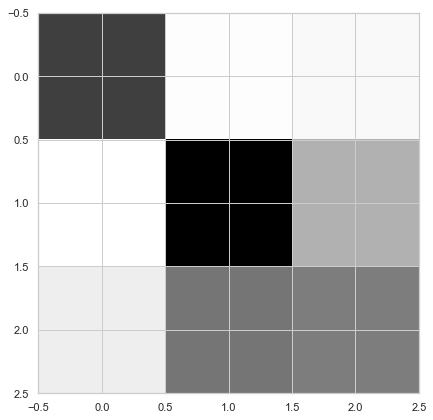

In [272]:
import matplotlib.pyplot as plt
import sklearn
conf = sklearn.metrics.confusion_matrix(y_true, y_pred)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

In [287]:
# precision, recall, F1-score
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_true, y_pred, average='macro')

(0.6591250174697066, 0.6642160676574043, 0.6602176897989903, None)

In [273]:
# Feature importance

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

bclf = ExtraTreesClassifier(n_estimators=100)

bclf = bclf.fit(X_train, y_train)
  
model = SelectFromModel(bclf, prefit=True)

X_new = model.transform


In [274]:
bclf.feature_importances_

array([0.02920397, 0.00438226, 0.02591525, 0.0323706 , 0.02856923,
       0.01687586, 0.01776156, 0.01397194, 0.0131261 , 0.01344068,
       0.0202798 , 0.0190927 , 0.01737049, 0.01689768, 0.01660412,
       0.01627069, 0.03044483, 0.02185188, 0.02143602, 0.02358027,
       0.02086372, 0.03008051, 0.        , 0.        , 0.02906457,
       0.02439505, 0.02195961, 0.02076176, 0.02502584, 0.04619279,
       0.02559569, 0.02750413, 0.02095715, 0.02188665, 0.02264664,
       0.02834108, 0.01912792, 0.02047773, 0.01052424, 0.00654782,
       0.01541939, 0.02555083, 0.03029409, 0.03330264, 0.03195632,
       0.01719483, 0.00838487, 0.01649818])

In [276]:
# feature importance

feature_importances = pd.DataFrame(rfclf_m1.feature_importances_,
                                   index = X_features.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances.head()

,importance
fav_percent,0.060416
txavg_word,0.056293
descriptionv4,0.051262
fav_number,0.050871
fav_pop1000,0.033979


In [277]:
feature_importances['importance_rank'] = feature_importances['importance'].rank(ascending=True)

feature_importances

,importance,importance_rank
fav_percent,0.060416,48.0
txavg_word,0.056293,47.0
descriptionv4,0.051262,46.0
fav_number,0.050871,45.0
fav_pop1000,0.033979,44.0
descriptionv6,0.032975,43.0
dschar_count,0.031981,42.0
descriptionv3,0.031092,41.0
log_twcount,0.030532,40.0
txchar_count,0.029671,39.0


In [278]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
#seed = 7

In [32]:
#fsclf = Pipeline([('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),('classification', RandomForestClassifier())])

In [34]:
#fsclf.fit(X_train, y_train)

In [279]:
model = SelectFromModel(rfclf_m1, prefit=True)
X_new = model.transform(X_train)
X_newtest = model.transform(X_test)               


In [280]:
X_new.shape

(11043, 24)

In [281]:
rfclf_m2 = RandomForestClassifier(random_state=0)
rfclf_m2.fit(X_new, y_train)

print("classifier accuracy:", rfclf_m2.score(X_newtest, y_test))  # score model

C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



classifier accuracy: 0.6160811300253531


In [284]:
# model with XGBoost

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
#from sklearn import cross_validation, metrics   #Additional scklearn functions
#from sklearn.grid_search import GridSearchCV   #Perforing grid search

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [44]:
'''
lets define a function which will help us create XGBoost models and perform cross-validation. 
The best part is that you can take this function as it is and use it later for your own models'''.

def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob)
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


In [ ]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

# fit model
modelfit(xgb1, train, predictors)


In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_


In [ ]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_


In [ ]:
param_test2b = {
 'min_child_weight':[6,8,10,12]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2b.fit(train[predictors],train[target])
modelfit(gsearch3.best_estimator_, train, predictors)
gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_


In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_


In [ ]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, train, predictors)


In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_


In [ ]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

# fit model
gsearch5.fit(train[predictors],train[target])


In [ ]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(train[predictors],train[target])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_


In [ ]:
param_test7 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

# fit gsearch7
gsearch7.fit(train[predictors],train[target])
# scores
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_


In [ ]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic'
nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, train, predictors)


In [ ]:
# test4 parameters
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
# fit model
modelfit(xgb4, train, predictors)


In [285]:
# parameter optimisation
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 65.48%


In [288]:
precision_recall_fscore_support(y_true, predictions, average='macro')

(0.6591250174697066, 0.6642160676574043, 0.6602176897989903, None)